# Vision Module

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#-----------FindOuterContour-----------------------------------------------------------

def FindOuterContour(img,verbose):
	imgCanny = cv2.Canny(img,150,300)
	contours,_=cv2.findContours(imgCanny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	#area=[]
	area_max=0
	maxContour=[]
	#s=0
	for i in contours:
		if cv2.contourArea(i)>area_max:
			maxContour=[]
			area_max=cv2.contourArea(i)
			peri = cv2.arcLength(i,True)
			approx=cv2.approxPolyDP(i, 0.02*peri, True)# gives us corner points
			bbox=cv2.boundingRect(approx)
			maxContour.append(area_max)
			maxContour.append(peri)
			maxContour.append(approx)
			maxContour.append(bbox)

	#print(maxContour[2])
	#print(sort.approx())
		#s=s+1
		#area.append(cv2.contourArea(i))
	#sorted_area=area.sort()
	#biggest=sorted_area[0]
	if (verbose):
		cv2.drawContours(img, contours, -1, (0,0,255),3)
	#cv2.drawContours(img, maxContour[2], -1, (0,255,0),3)


	for points in approx:
		x,y=points[0]
		cv2.circle(img, (x, y), 3, (0, 255, 0), -1)

	return imgCanny,maxContour

def CropImage(img, contours):
	#imgCroped=img
	#np_cont=np.array([[139 330]],[[848 505]], [[383 53]], [[253 656]])
	#np_cont=np.array(contours)
	np_cont=np.array(contours[2])#[[[697, 22]],[[109, 285]],[[278, 669]], [[865, 409]]])#[]
	#for i in len(contours)
		#np_cont.append()#np.array([[[697, 22]],[[109, 285]],[[278, 669]], [[865, 409]]])
	rect = cv2.minAreaRect(np_cont)
	#print("rect" +str(rect))
	box = cv2.boxPoints(rect) #bottom point is first then clockwise
	#print("box" +str(box))
	box = np.int0(box)
	#print("box2" +str(box))
	width = int(rect[1][1])
	height = int(rect[1][0])
	src_pts = box.astype("float32")
	#print("src_pts" +str(src_pts))
	dst_pts = np.array([[0, 0],[width-1, 0],[width-1, height-1],[0, height-1]], dtype="float32")
	#print("dst_pts" +str(dst_pts))
	M = cv2.getPerspectiveTransform(src_pts, dst_pts)
	warped = cv2.warpPerspective(img, M, (width, height))

	return warped

def FindContour(img,verbose):
	imgCanny = cv2.Canny(img,100,100)
	cont,_=cv2.findContours(imgCanny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	#area=[]
	area_max=0
	Contours=[]
	Contours.append(len(cont))
	if (len(cont))>0:
		for i in cont:
			area=cv2.contourArea(i)
			peri = cv2.arcLength(i,True)
			approx=cv2.approxPolyDP(i, 0.02*peri, True)# gives us corner points
			bbox=cv2.boundingRect(approx)
			Contours.append(area)
			Contours.append(peri)
			Contours.append(approx)
			Contours.append(bbox)

	if (verbose):
		cv2.drawContours(img, cont, -1, (0,0,255),3)

	return imgCanny,Contours

In [3]:
path= 'images/edgeDetect3.jpg'
img=cv2.imread(path)
imgCanny,contours=FindOuterContour(img,0)
warpedImg=CropImage(img, contours)

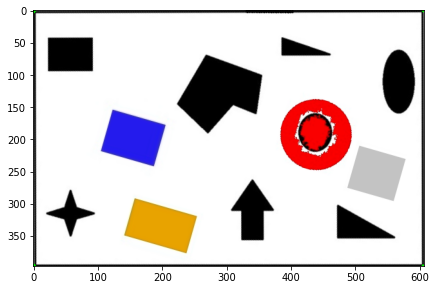

In [4]:
plt.figure(figsize=(7,7))
plt.imshow(warpedImg)

## Dectect Thymio through a blue mask

In [5]:
hsv_rescaled = cv2.cvtColor(warpedImg, cv2.COLOR_RGB2HSV)
# Picking out a range
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
# Binary mask ('1s' indicate values within the range, and '0s' values indicate values outside)
mask_thymio = cv2.inRange(hsv_rescaled, lower_blue, upper_blue)
#Hue value varies from 0-179,
#Saturation value varies from 0-255 
#Value value varies from 0-255
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print( hsv_green )

[[[ 60 255 255]]]


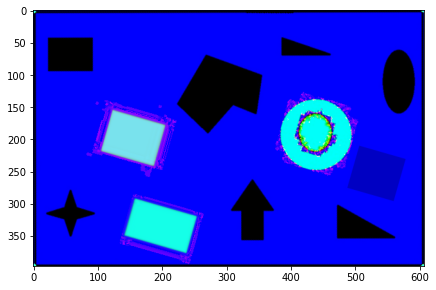

In [6]:
plt.figure(figsize=(7,7))
plt.imshow(hsv_rescaled)

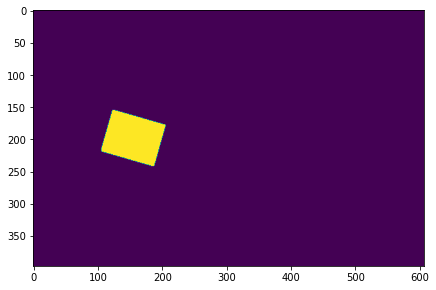

In [7]:
plt.figure(figsize=(7,7))
plt.imshow(mask_thymio)

In [8]:
# detecting the index of the pixels forming the robot
index_thymio = np.where(mask_thymio==255)
if len(index_thymio[0]) > 0:
    # Taking the mean y of all these points
    y = math.floor(index_thymio[0].mean())
    x = math.floor(index_thymio[1].mean())
print(x)
print(y)

155
197


# Remarks for integration with global navigation

système de coordonées n'est pas celui de la map <br/>
les axes sont inversés x<->y et y<->x
l'orgine des axes est pas la meme: y[350] <-> y[0]

Une taille de 600x600 de map c'est la mort pour le plus court chemin, il faut réduire cette taille absolument. Solution:

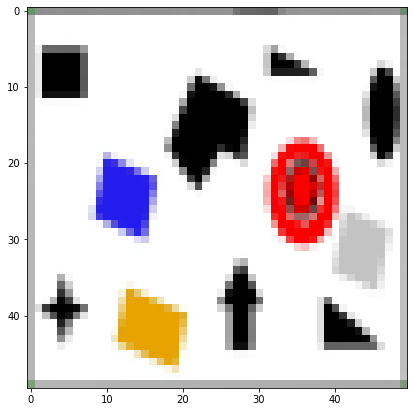

In [9]:
resized = cv2.resize(warpedImg, (50,50), interpolation = cv2.INTER_AREA)
plt.figure(figsize=(7,7))
plt.imshow(resized)